# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your Code Here

In [2]:
# Matplotlib inline para visualizar los gráficos de Matplotlib
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

In [3]:
# Configuración para setear y que todas las fig de Seaborn salgan por defecto con este tamaño
# Se puede especificar el tamaño de cada figura
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,4.)})
sns.set_style("whitegrid")

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [4]:
fitbit = pd.read_csv('../data/Fitbit2.csv')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

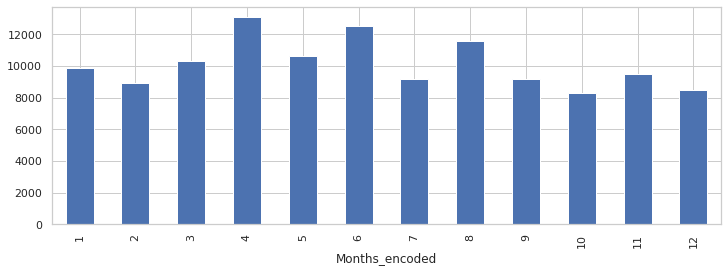

In [5]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here
meanpermonth = fitbit.groupby(["Months_encoded"])["Steps"].mean().plot(kind="bar");

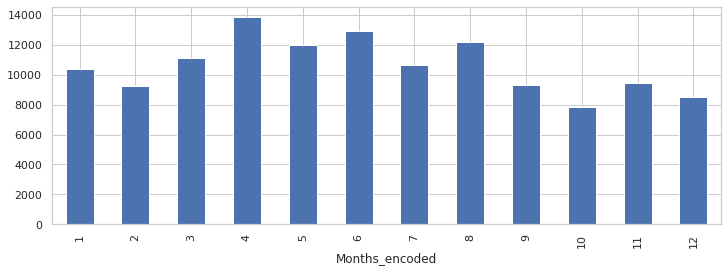

In [6]:
medianpermonth = fitbit.groupby(["Months_encoded"])["Steps"].median().plot(kind="bar");

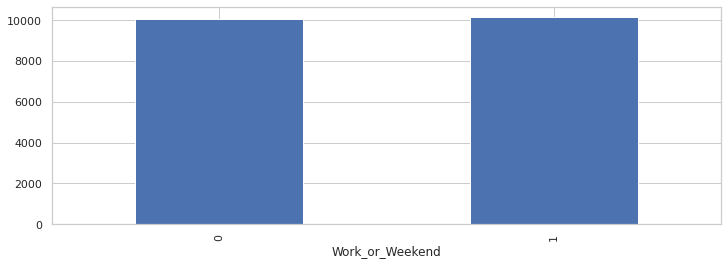

In [7]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
# your code here
meanperweekend = fitbit.groupby(["Work_or_Weekend"])["Steps"].mean().plot(kind="bar");

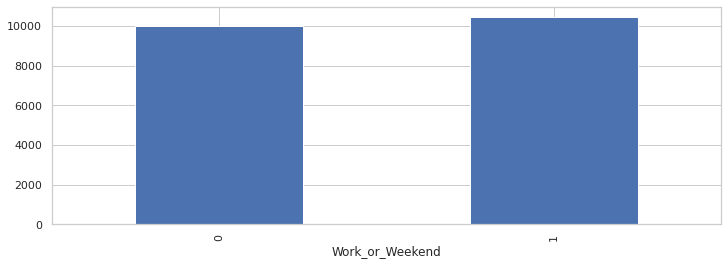

In [8]:
medianperweekend = fitbit.groupby(["Work_or_Weekend"])["Steps"].median().plot(kind="bar");

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

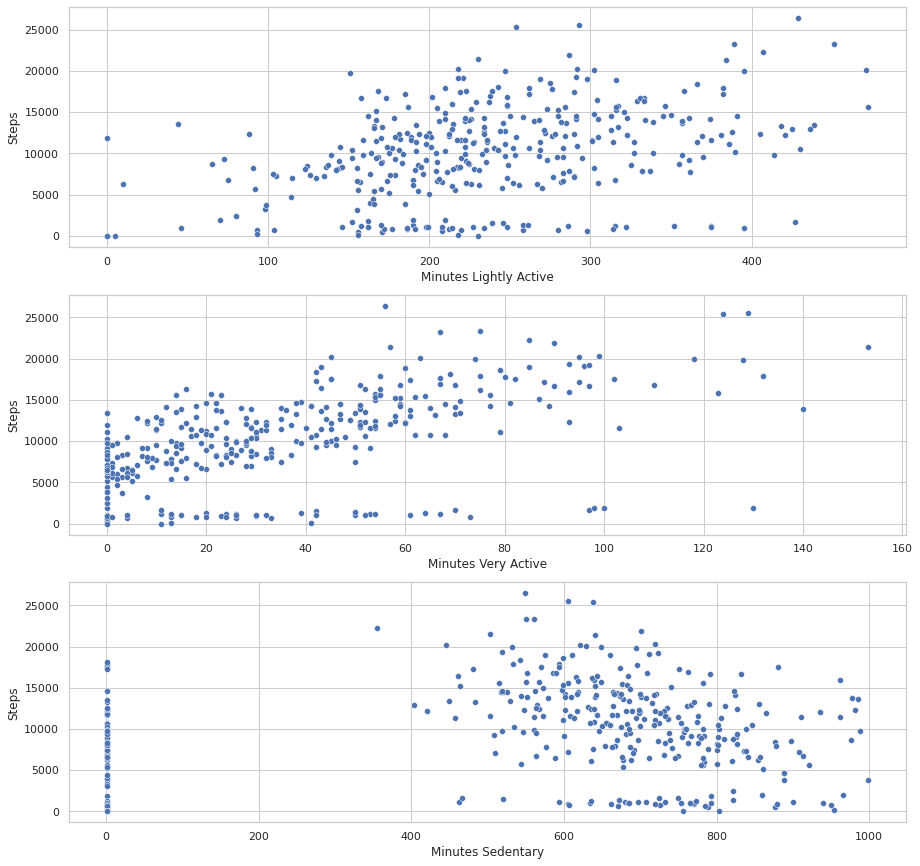

In [9]:
# your code here
collist = ["Minutes Lightly Active","Minutes Very Active","Minutes Sedentary"] #lista de columnas

ran = len(collist) #rango y número total de filas que se mostrán en total. 1 por columna
df = fitbit
a = 0
correlative = "Steps" #columna con la que se comparan cada una de las columnas de la lsta

fig, axs = plt.subplots(nrows=ran, ncols=1, figsize=(15,15))

for a in range(ran):
    sns.scatterplot(data = df, x= collist[a], y = correlative, ax = axs[a])
    a += 1

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [10]:
titanic = pd.read_csv('../data/titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [11]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [12]:
# NUMERICAL VARIABLES
numericas = titanic.select_dtypes(include=np.number)

In [13]:
# CATEGORICAL VARIABLES
categoricas = titanic.select_dtypes(include=object)

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [14]:
# your code here
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("white")

#### Use the right visulalization to show the distribution of column `Age`.

<AxesSubplot:ylabel='Frequency'>

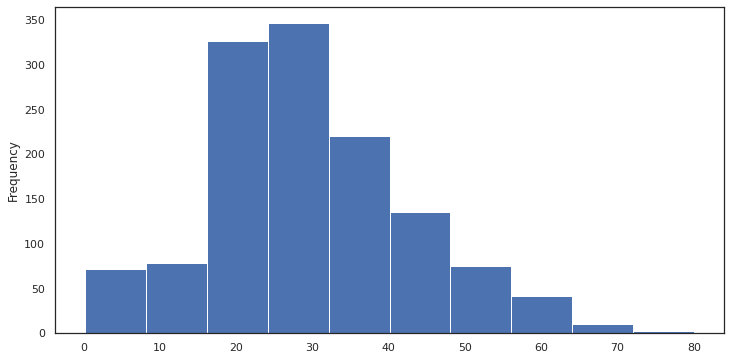

In [15]:
# your code here
titanic.Age.plot.hist()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

<AxesSubplot:xlabel='Age', ylabel='Count'>

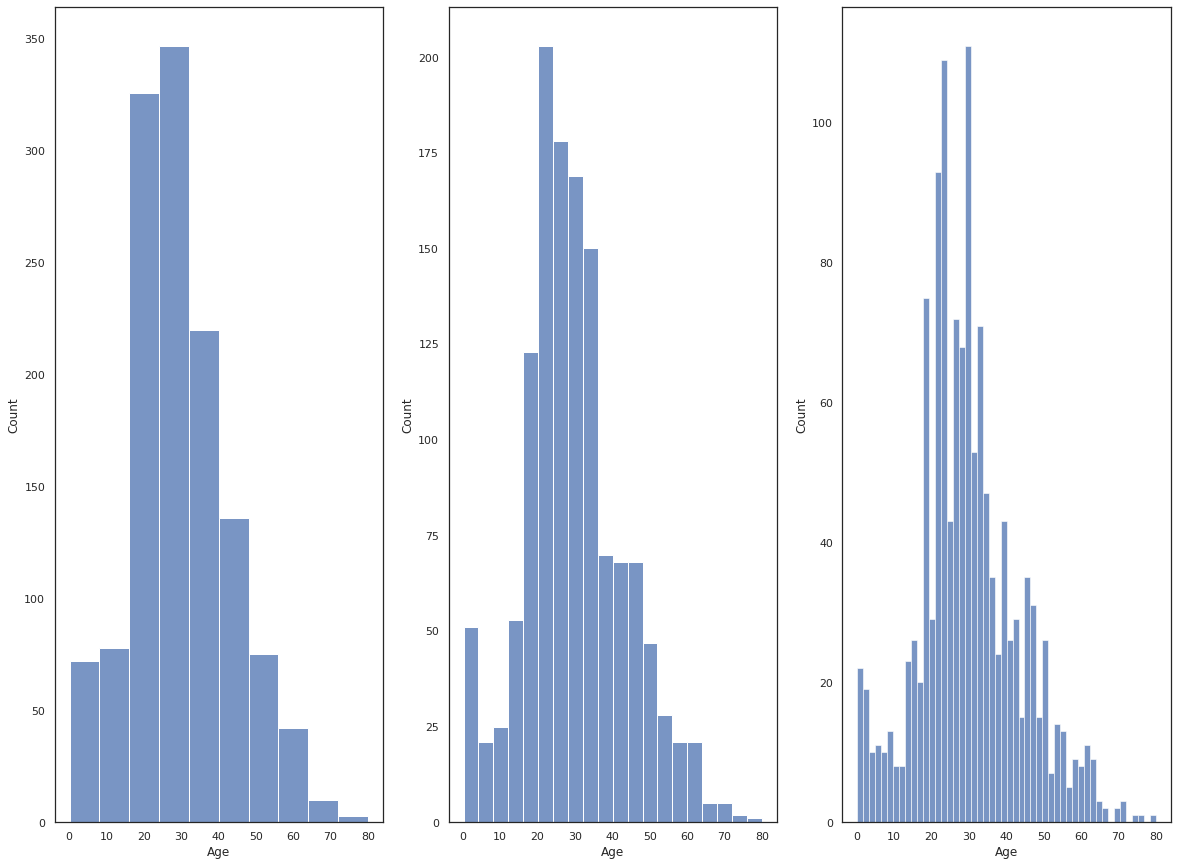

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,15))
sns.histplot(x=titanic.Age, bins=10, ax=axs[0])
sns.histplot(x=titanic.Age, bins=20, ax=axs[1])
sns.histplot(x=titanic.Age, bins=50, ax=axs[2])

#### How does the bin size affect your plot?

In [17]:
"""
The bigger the number in bin size, the thinner the bins and the more you get.
"""

'\nThe bigger the number in bin size, the thinner the bins and the more you get.\n'

#### Use seaborn to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

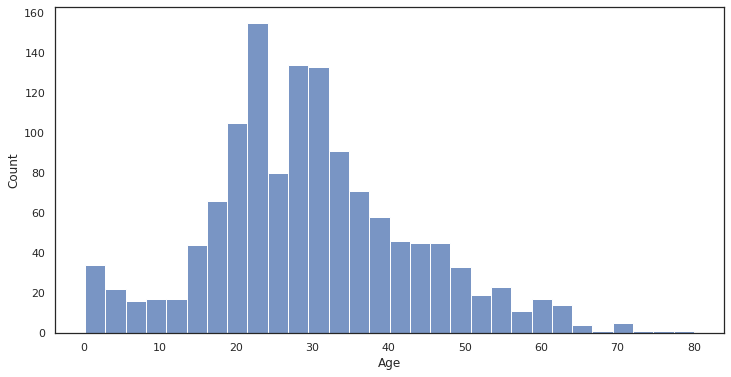

In [18]:
sns.histplot(x=titanic.Age)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<AxesSubplot:>

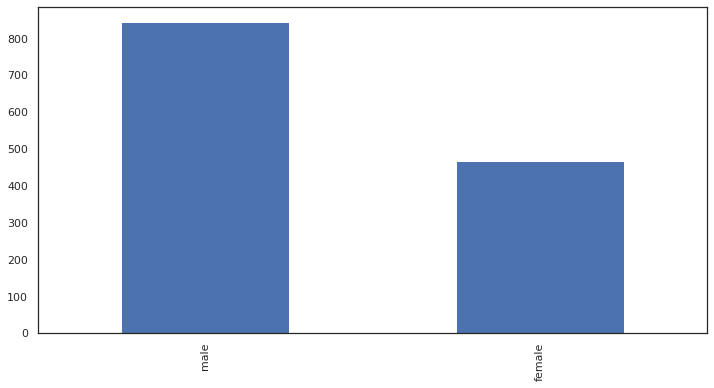

In [19]:
# Method 1 - matplotlib
titanic.Gender.value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Gender', ylabel='Count'>

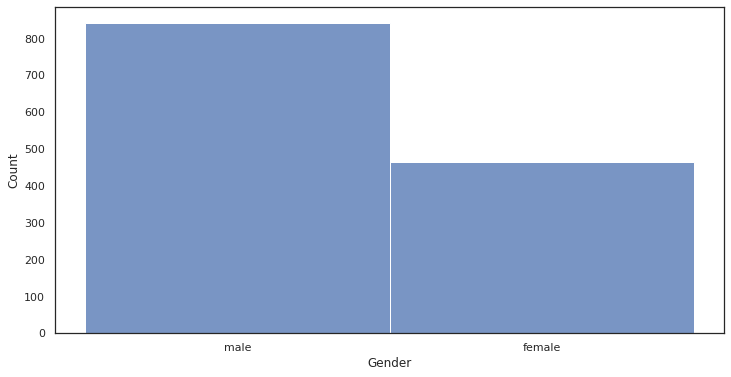

In [20]:
# Method 2 - seaborn
sns.histplot(x=titanic.Gender)

#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

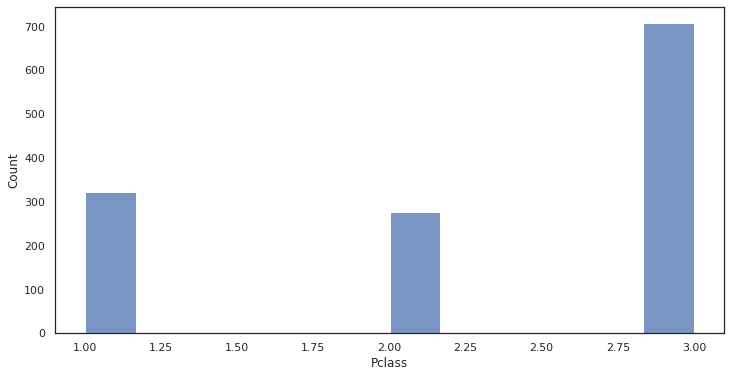

In [21]:
sns.histplot(x=titanic.Pclass)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:xlabel='Age'>

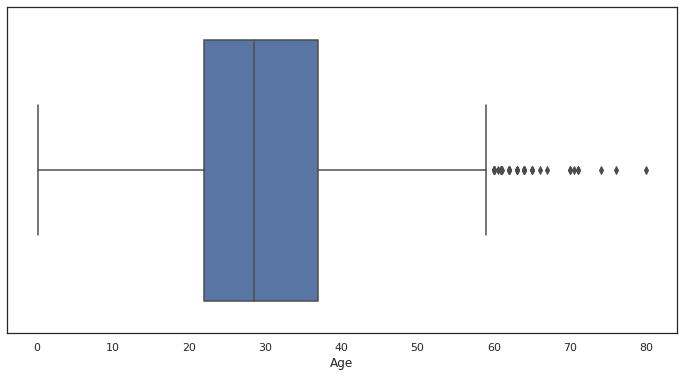

In [22]:
# your code here
sns.boxplot(x="Age", data=titanic)

In [23]:
"""
You can see the 4 quartiles, mean, median and outliers.
"""

'\nYou can see the 4 quartiles, mean, median and outliers.\n'

#### What does the last plot tell you about the feature `Age`?

In [24]:
"""
It tells me the most frequent ages are in the range 20-40 and the 60-80 range is an outlier.
"""

'\nIt tells me the most frequent ages are in the range 20-40 and the 60-80 range is an outlier.\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

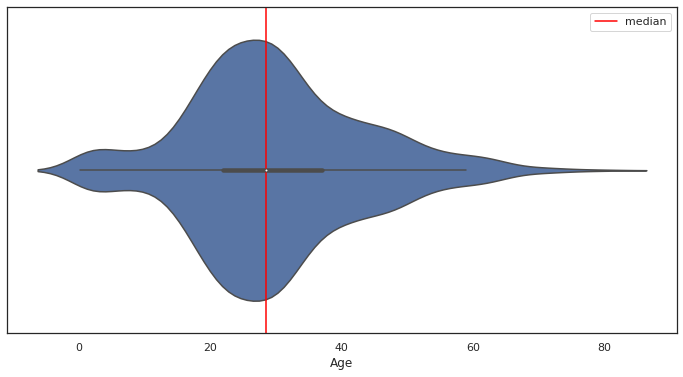

In [25]:
violin = sns.violinplot(x=titanic.Age)
violin.axvline(x=titanic.Age.median(), c="red", label="median")
plt.legend()

#### What additional information does the last plot provide about feature `Age`?

In [26]:
"""
We can also see the density of the data.
"""

'\nWe can also see the density of the data.\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

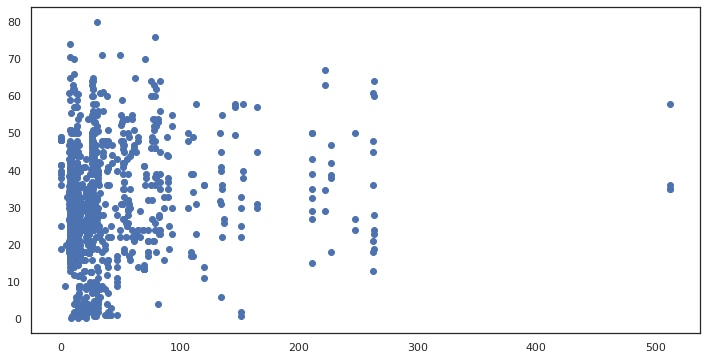

In [27]:
# Method 1 - matplotlib
plt.scatter(x=titanic.Fare, y=titanic.Age);
# your code here

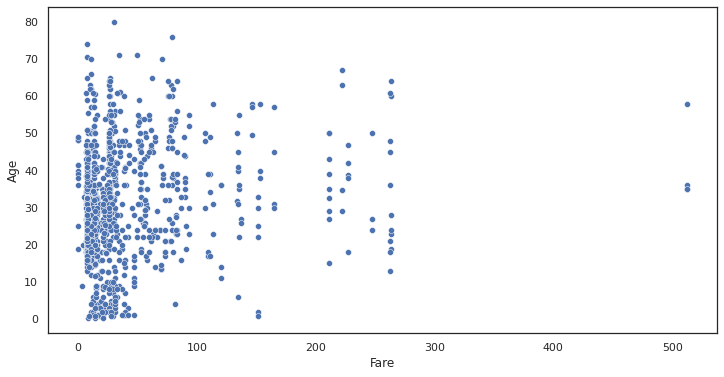

In [28]:
# Method 2 - seaborn
sns.scatterplot(x="Fare", y="Age", data=titanic);

#### Plot the correlation matrix using seaborn.

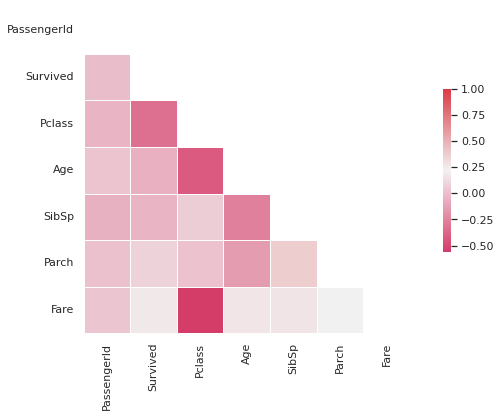

In [29]:
corr=titanic.corr()
mascara = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores
sns.heatmap(corr,  
            mask = mascara,
            cmap=color_map,
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            cbar_kws={"shrink": .5} #barra lateral
);

#### What are the most correlated features?

In [30]:
"""
Fare and Pclas
"""

'\nFare and Pclas\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

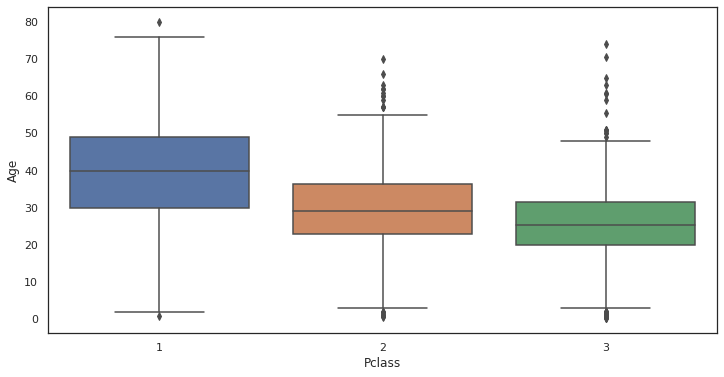

In [31]:
sns.boxplot(x="Pclass", y="Age", data=titanic)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

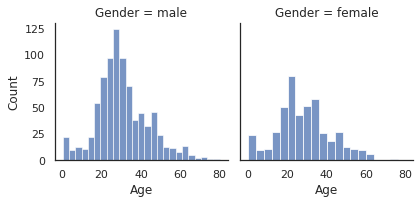

In [32]:
g = sns.FacetGrid(titanic, col="Gender")
g.map(sns.histplot,"Age")
#g.add_legend()